<a href="https://colab.research.google.com/github/Vinaypatil-Ev/vinEvPy-GoCoLab/blob/main/FIFA_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Lests Play **FIFA**
<br/>
group members:
<br />
1. vinay patil
<br />
2. satya shanmuk

## Introduction:
Football is arguably the most popular sport in the world and FIFA is the most popular football (soccer) simulation game by Electronic Arts (EA Sports)
FIFA is one of the most played console games in the
world. Being among the billions of fans towards football
and FIFA made us to choose this topic for our project.

The dataset have provided all the players informatio from FIFA 15 to FIFA 20.

0. We have done Exploratory Data Analysis on data.
1. Using the datasets, we have Ranked the Players
accordingly.
2. Training on data from FIFA 19, we have classified the
player position for FIFA 20 Edition.
3. Study player data from Division 1 European League
players from the last 5 Years. Analyse changes in player
stats and value. Rank the clubs according to best increase
in statistics of a player

# Steps:

### 1. Import the all necessary libraries

In [81]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OrdinalEncoder
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_validate
from sklearn.metrics import mean_squared_error
from sklearn.metrics import accuracy_score
from sklearn.metrics import r2_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns
# sns.set()
%matplotlib inline

### 2. Load the dataset

In [82]:
file_name = "players_19.csv"
df = pd.read_csv(file_name)
df20 = pd.read_csv("players_20.csv")
df.head(5)

,sofifa_id,player_url,short_name,long_name,age,dob,height_cm,weight_kg,nationality,club,overall,potential,value_eur,wage_eur,player_positions,preferred_foot,international_reputation,weak_foot,skill_moves,work_rate,body_type,real_face,release_clause_eur,player_tags,team_position,team_jersey_number,loaned_from,joined,contract_valid_until,nation_position,nation_jersey_number,pace,shooting,passing,dribbling,defending,physic,gk_diving,gk_handling,gk_kicking,...,mentality_aggression,mentality_interceptions,mentality_positioning,mentality_vision,mentality_penalties,mentality_composure,defending_marking,defending_standing_tackle,defending_sliding_tackle,goalkeeping_diving,goalkeeping_handling,goalkeeping_kicking,goalkeeping_positioning,goalkeeping_reflexes,ls,st,rs,lw,lf,cf,rf,rw,lam,cam,ram,lm,lcm,cm,rcm,rm,lwb,ldm,cdm,rdm,rwb,lb,lcb,cb,rcb,rb
0,20801,https://sofifa.com/player/20801/c-ronaldo-dos-...,Cristiano Ronaldo,Cristiano Ronaldo dos Santos Aveiro,33,1985-02-05,187,83,Portugal,Juventus,94,94,77000000,405000,"ST, LW",Right,5,4,5,High/Low,C. Ronaldo,Yes,127100000.0,"#Speedster, #Dribbler, #Distance Shooter, #Acr...",LW,7.0,NaN,2018-07-10,2022.0,LS,7.0,90.0,93.0,81.0,89.0,35.0,79.0,NaN,NaN,NaN,...,63,29,95,82,85,95,28,31,23,7,11,15,14,11,91+3,91+3,91+3,89+3,90+3,90+3,90+3,89+3,88+3,88+3,88+3,88+3,81+3,81+3,81+3,88+3,65+3,61+3,61+3,61+3,65+3,61+3,53+3,53+3,53+3,61+3
1,158023,https://sofifa.com/player/158023/lionel-messi/...,L. Messi,Lionel Andrés Messi Cuccittini,31,1987-06-24,170,72,Argentina,FC Barcelona,94,94,110500000,565000,"CF, RW, ST",Left,5,4,4,Medium/Medium,Messi,Yes,226500000.0,"#Dribbler, #Distance Shooter, #FK Specialist, ...",RW,10.0,NaN,2004-07-01,2021.0,CF,10.0,88.0,91.0,88.0,96.0,32.0,61.0,NaN,NaN,NaN,...,48,22,94,94,75,96,33,28,26,6,11,15,14,8,88+2,88+2,88+2,92+2,93+2,93+2,93+2,92+2,93+2,93+2,93+2,90+2,84+2,84+2,84+2,90+2,63+2,61+2,61+2,61+2,63+2,58+2,47+2,47+2,47+2,58+2
2,190871,https://sofifa.com/player/190871/neymar-da-sil...,Neymar Jr,Neymar da Silva Santos Junior,26,1992-02-05,175,68,Brazil,Paris Saint-Germain,92,93,118500000,290000,"LW, CAM",Right,5,5,5,High/Medium,Neymar,Yes,228100000.0,"#Speedster, #Dribbler, #FK Specialist, #Acroba...",CAM,10.0,NaN,2017-08-03,2022.0,LW,10.0,92.0,84.0,83.0,95.0,32.0,59.0,NaN,NaN,NaN,...,56,36,89,87,81,94,27,24,33,9,9,15,15,11,84+3,84+3,84+3,89+3,89+3,89+3,89+3,89+3,89+3,89+3,89+3,88+3,81+3,81+3,81+3,88+3,65+3,60+3,60+3,60+3,65+3,60+3,47+3,47+3,47+3,60+3
3,193080,https://sofifa.com/player/193080/david-de-gea-...,De Gea,David De Gea Quintana,27,1990-11-07,193,76,Spain,Manchester United,91,93,72000000,260000,GK,Right,4,3,1,Medium/Medium,Lean,Yes,138600000.0,NaN,GK,1.0,NaN,2011-07-01,2019.0,GK,1.0,NaN,NaN,NaN,NaN,NaN,NaN,90.0,85.0,87.0,...,38,30,12,68,40,68,15,21,13,90,85,87,88,94,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,192985,https://sofifa.com/player/192985/kevin-de-bruy...,K. De Bruyne,Kevin De Bruyne,27,1991-06-28,181,70,Belgium,Manchester City,91,92,102000000,355000,"CAM, CM",Right,4,5,4,High/High,Normal,Yes,196400000.0,"#Dribbler, #Playmaker , #Engine, #Distance Sh...",RCM,17.0,NaN,2015-08-30,2023.0,RCM,7.0,77.0,86.0,92.0,87.0,60.0,78.0,NaN,NaN,NaN,...,76,60,87,94,79,88,67,58,51,15,13,5,10,13,82+3,82+3,82+3,87+3,87+3,87+3,87+3,87+3,88+3,88+3,88+3,88+3,87+3,87+3,87+3,88+3,77+3,77+3,77+3,77+3,77+3,73+3,66+3,66+3,66+3,73+3


### 3. Exploratory Data Analysis

In Exploratory data analysis we have answer(in graphs) the questions such as:
1. Who are the most reputed players in the world
2. Who are are higly paid players.
3. what are the countries with highest representation of data.
4. what is the age distribution of players
5. Who are the best player overall


#### 1.Most Reputed International players

In [83]:
top10_famous = df[["short_name", "international_reputation"]].iloc[np.argsort(df.international_reputation)[::-1]].head(10)[::-1]

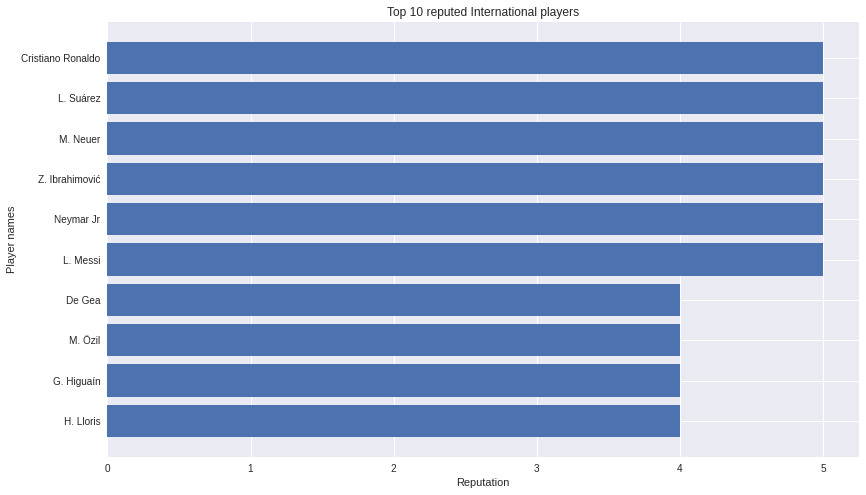

In [84]:
# plt.style.use("fivethirtyeight")
# plt.style.use("seaborn-poster")
plt.style.use("seaborn")
plt.figure(figsize=(12, 8))
plt.barh(top10_famous["short_name"], top10_famous["international_reputation"])
plt.title("Top 10 reputed International players")
plt.xlabel("Reputation")
plt.ylabel("Player names")
plt.show()

#### 2. Highly paid players.

In [85]:
top10_wage_player = df[["short_name", "wage_eur"]].iloc[np.argsort(df["wage_eur"])[::-1]]
top10_wage = top10_wage_player.head(11)[::-1]
other_avg =  np.average(top10_wage_player["wage_eur"][11:])
top10_wage.iloc[0] = ["Other players avg", 100000]

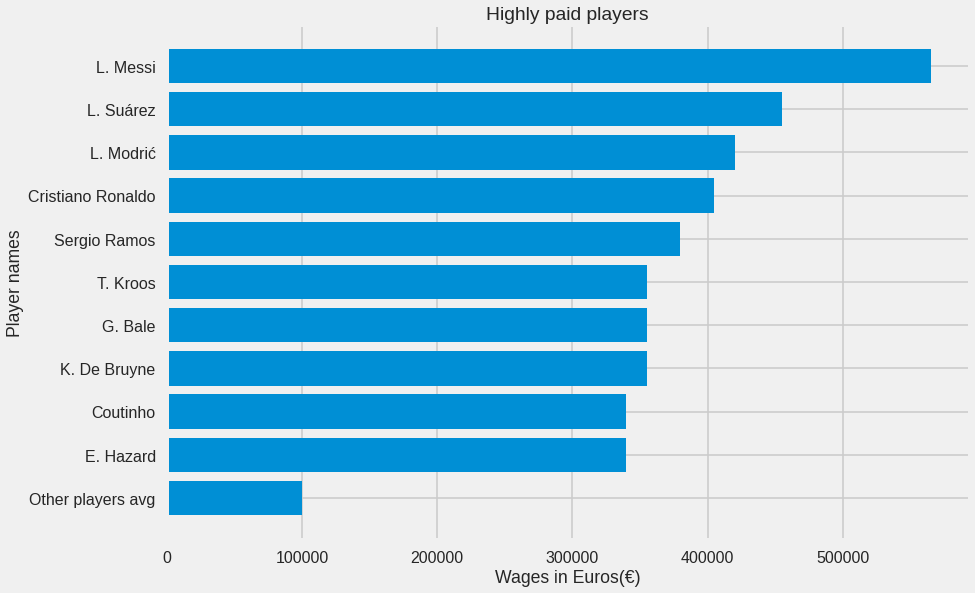

In [86]:
plt.style.use("fivethirtyeight")
plt.style.use("seaborn-poster")
plt.barh(top10_wage["short_name"], top10_wage["wage_eur"])
plt.title("Highly paid players")
plt.xlabel("Wages in Euros(€)")
plt.ylabel("Player names")
plt.show()

#### 3. Most representative countries in the FIFA

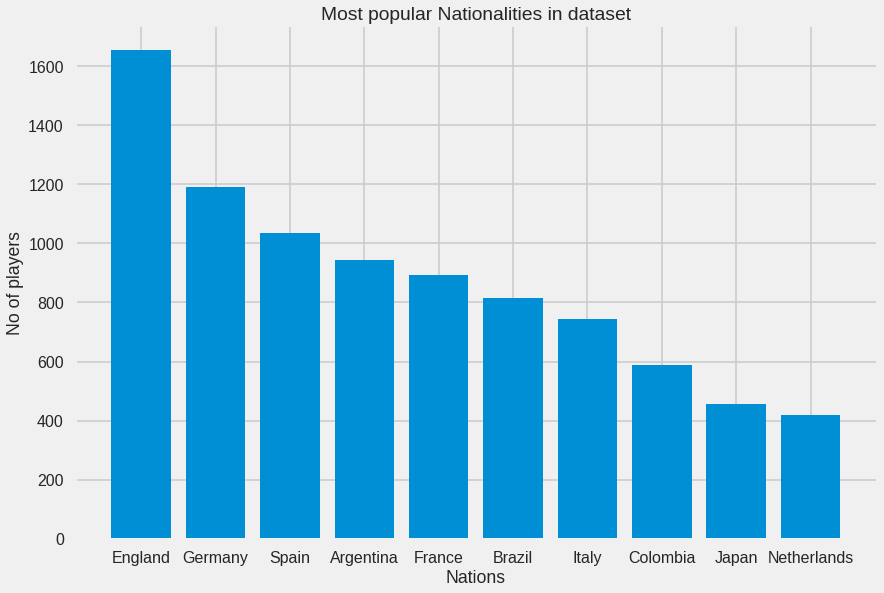

In [87]:
top10_nation_dict = df.groupby("nationality").groups
top10_nation = {k: len(v) for k, v in top10_nation_dict.items()}
top10_nation = sorted(top10_nation.items(), key=lambda x: -x[1])[:10]
top10_nation = pd.DataFrame(top10_nation, columns=["Nationality", "Rank"])
plt.style.use("fivethirtyeight")
plt.style.use("seaborn-poster")
plt.bar(top10_nation["Nationality"], top10_nation["Rank"])
plt.title("Most popular Nationalities in dataset")
plt.xlabel("Nations")
plt.ylabel("No of players")
plt.show()

In [88]:
top10_nation_dict["United Kingdom"] = top10_nation_dict["England"]
x = px.data.gapminder().query("year==2007")
x["counts"] = [0] * len(px.data.gapminder().query("year==2007"))
for k, v in top10_nation_dict.items():
    x.loc[x["country"] == k, "counts"] = len(v)

fig = px.choropleth(x, locations="iso_alpha",
                    color="counts", 
                    hover_name="country", # column to add to hover information
                    color_continuous_scale=px.colors.sequential.Plasma)

fig.show()

#### 4.Age distributions of FIFA players

In [89]:
top10_age_dict = df.groupby("age").groups
top10_age = {k: len(v) for k, v in top10_age_dict.items()}
top10_age = sorted(top10_age.items(), key=lambda x: x[0])
top10_age = pd.DataFrame(top10_age, columns=["Age", "Rank"])

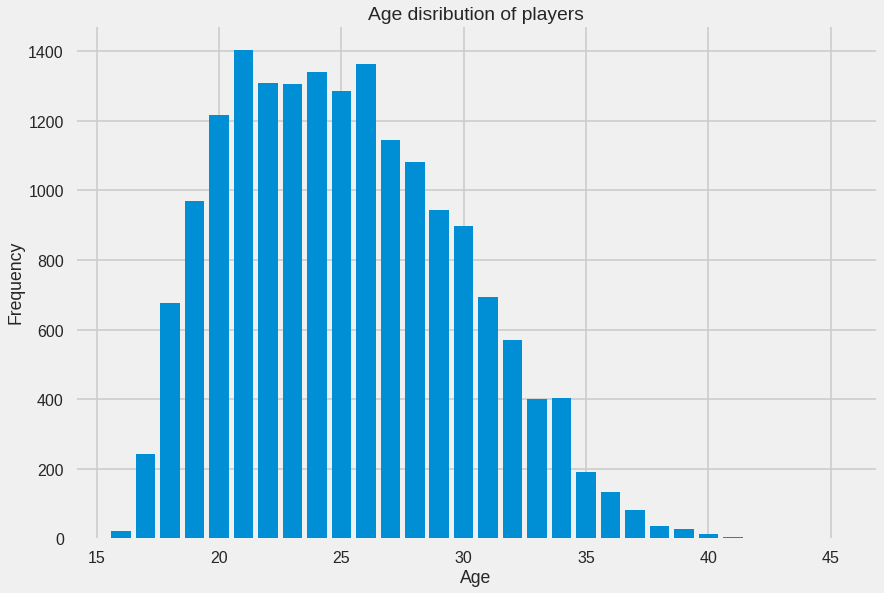

In [90]:
plt.style.use("fivethirtyeight")
plt.style.use("seaborn-poster")
plt.bar(top10_age["Age"], top10_age["Rank"])
plt.title("Age disribution of players")
plt.xlabel("Age")
plt.ylabel("Frequency")
plt.show()

#### 5.Overall rank of the players in FIFA 2019

In [91]:
rank_19 = df[["short_name", "overall"]].iloc[np.argsort(df.overall)[::-1]]
rank_19 = rank_19.head(25)[::-1]

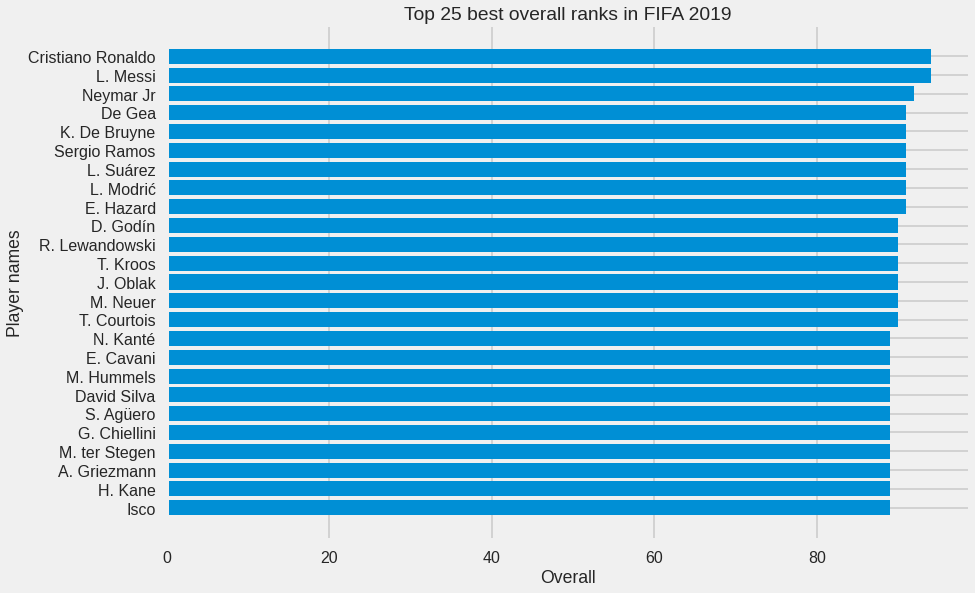

In [92]:
plt.style.use("fivethirtyeight")
plt.style.use("seaborn-poster")
plt.barh(rank_19["short_name"], rank_19["overall"])
plt.title("Top 25 best overall ranks in FIFA 2019")
plt.xlabel("Overall")
plt.ylabel("Player names")
plt.show()

# Preprocessing data

In [93]:
# drop unnecessary columns which are not for any predictions
def drop_col(df):
    unecessary = ["sofifa_id", "player_url", "long_name", "dob", "body_type", "real_face", 
              "player_tags", "release_clause_eur", "team_position", "loaned_from",
              "joined", "contract_valid_until", "nation_position", "team_jersey_number", "nation_jersey_number",
              "gk_diving", "gk_handling", "gk_kicking", "gk_reflexes", "gk_speed", "gk_positioning", "player_traits", "work_rate"]
    return df.drop(unecessary, axis=1)

# remove Nan values
def remove_nan(df, value="0"):
    return df.fillna(value)

# encode the data in the form 27 + 5; 
# it needs to be convert into 27 + 5 = 32
def remove_sign(df):
    def plus_min_no(x):
        if "+" in x:
            a, b = x.split("+")
            return int(a) + int(b)
        if "-" in x:
            a, b = x.split("-")
            return int(a) - int(b)
        return x

    for col in df.columns:
        if any(df[col].astype(str).str.contains("\+")):
            df[col] = df[[col]].applymap(plus_min_no)

    return df

# ordinal encoder 
def ord_encode(df, col=["preferred_foot"]):
    def ord_enc(df, c):
        enc = OrdinalEncoder()
        return enc.fit_transform(df[[c]])
    for i in col:
        df[i] = ord_enc(df, i)
    return df





def pos_encode(df):
    pos = {'GK': 1, 'LB': 2, 'RB': 2, 'RWB': 2, 'LWB': 2, 'CB': 3, 'RM': 4, 'LM': 4, 
           'CDM': 5, 'CM': 6, 'CAM': 7, 'CF': 8, 'LW': 9, 'RW': 9, 'ST': 10}
    
    def pos_fun(x):
        x = x.strip()
        if "," in x:
            x = x.split(",")[0]
        return pos[x]

    df['player_positions'] = df[['player_positions']].applymap(pos_fun)

    return df

# preprocess wrapper for above all ops
def preprocess_df(df):
    df = drop_col(df)
    df = remove_nan(df)
    df = remove_sign(df)
    df = ord_encode(df, ["preferred_foot"])
    df = pos_encode(df)
    return df

# # preprocess wrapper for above all ops + drop some required string data
def preprocess_df_without_str(df, col = ["short_name", "nationality", "club"]):
    # col = ["short_name", "nationality", "club"]
    df = drop_col(df)
    df = remove_nan(df)
    df = remove_sign(df)
    df = ord_encode(df, ["preferred_foot"])
    df = pos_encode(df)
    df = df.drop(col, axis=1)
    return df

# Part A - Rank the Players 

#### 1. Preprocess the data

In [94]:
df19 = pd.read_csv("players_19.csv")
df20 = pd.read_csv("players_20.csv")
df19.head()

,sofifa_id,player_url,short_name,long_name,age,dob,height_cm,weight_kg,nationality,club,overall,potential,value_eur,wage_eur,player_positions,preferred_foot,international_reputation,weak_foot,skill_moves,work_rate,body_type,real_face,release_clause_eur,player_tags,team_position,team_jersey_number,loaned_from,joined,contract_valid_until,nation_position,nation_jersey_number,pace,shooting,passing,dribbling,defending,physic,gk_diving,gk_handling,gk_kicking,...,mentality_aggression,mentality_interceptions,mentality_positioning,mentality_vision,mentality_penalties,mentality_composure,defending_marking,defending_standing_tackle,defending_sliding_tackle,goalkeeping_diving,goalkeeping_handling,goalkeeping_kicking,goalkeeping_positioning,goalkeeping_reflexes,ls,st,rs,lw,lf,cf,rf,rw,lam,cam,ram,lm,lcm,cm,rcm,rm,lwb,ldm,cdm,rdm,rwb,lb,lcb,cb,rcb,rb
0,20801,https://sofifa.com/player/20801/c-ronaldo-dos-...,Cristiano Ronaldo,Cristiano Ronaldo dos Santos Aveiro,33,1985-02-05,187,83,Portugal,Juventus,94,94,77000000,405000,"ST, LW",Right,5,4,5,High/Low,C. Ronaldo,Yes,127100000.0,"#Speedster, #Dribbler, #Distance Shooter, #Acr...",LW,7.0,NaN,2018-07-10,2022.0,LS,7.0,90.0,93.0,81.0,89.0,35.0,79.0,NaN,NaN,NaN,...,63,29,95,82,85,95,28,31,23,7,11,15,14,11,91+3,91+3,91+3,89+3,90+3,90+3,90+3,89+3,88+3,88+3,88+3,88+3,81+3,81+3,81+3,88+3,65+3,61+3,61+3,61+3,65+3,61+3,53+3,53+3,53+3,61+3
1,158023,https://sofifa.com/player/158023/lionel-messi/...,L. Messi,Lionel Andrés Messi Cuccittini,31,1987-06-24,170,72,Argentina,FC Barcelona,94,94,110500000,565000,"CF, RW, ST",Left,5,4,4,Medium/Medium,Messi,Yes,226500000.0,"#Dribbler, #Distance Shooter, #FK Specialist, ...",RW,10.0,NaN,2004-07-01,2021.0,CF,10.0,88.0,91.0,88.0,96.0,32.0,61.0,NaN,NaN,NaN,...,48,22,94,94,75,96,33,28,26,6,11,15,14,8,88+2,88+2,88+2,92+2,93+2,93+2,93+2,92+2,93+2,93+2,93+2,90+2,84+2,84+2,84+2,90+2,63+2,61+2,61+2,61+2,63+2,58+2,47+2,47+2,47+2,58+2
2,190871,https://sofifa.com/player/190871/neymar-da-sil...,Neymar Jr,Neymar da Silva Santos Junior,26,1992-02-05,175,68,Brazil,Paris Saint-Germain,92,93,118500000,290000,"LW, CAM",Right,5,5,5,High/Medium,Neymar,Yes,228100000.0,"#Speedster, #Dribbler, #FK Specialist, #Acroba...",CAM,10.0,NaN,2017-08-03,2022.0,LW,10.0,92.0,84.0,83.0,95.0,32.0,59.0,NaN,NaN,NaN,...,56,36,89,87,81,94,27,24,33,9,9,15,15,11,84+3,84+3,84+3,89+3,89+3,89+3,89+3,89+3,89+3,89+3,89+3,88+3,81+3,81+3,81+3,88+3,65+3,60+3,60+3,60+3,65+3,60+3,47+3,47+3,47+3,60+3
3,193080,https://sofifa.com/player/193080/david-de-gea-...,De Gea,David De Gea Quintana,27,1990-11-07,193,76,Spain,Manchester United,91,93,72000000,260000,GK,Right,4,3,1,Medium/Medium,Lean,Yes,138600000.0,NaN,GK,1.0,NaN,2011-07-01,2019.0,GK,1.0,NaN,NaN,NaN,NaN,NaN,NaN,90.0,85.0,87.0,...,38,30,12,68,40,68,15,21,13,90,85,87,88,94,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,192985,https://sofifa.com/player/192985/kevin-de-bruy...,K. De Bruyne,Kevin De Bruyne,27,1991-06-28,181,70,Belgium,Manchester City,91,92,102000000,355000,"CAM, CM",Right,4,5,4,High/High,Normal,Yes,196400000.0,"#Dribbler, #Playmaker , #Engine, #Distance Sh...",RCM,17.0,NaN,2015-08-30,2023.0,RCM,7.0,77.0,86.0,92.0,87.0,60.0,78.0,NaN,NaN,NaN,...,76,60,87,94,79,88,67,58,51,15,13,5,10,13,82+3,82+3,82+3,87+3,87+3,87+3,87+3,87+3,88+3,88+3,88+3,88+3,87+3,87+3,87+3,88+3,77+3,77+3,77+3,77+3,77+3,73+3,66+3,66+3,66+3,73+3


In [95]:
# preprocessed data
fifa19 = preprocess_df(df19)
fifa20 = preprocess_df(df20)
fifa20.head()

,short_name,age,height_cm,weight_kg,nationality,club,overall,potential,value_eur,wage_eur,player_positions,preferred_foot,international_reputation,weak_foot,skill_moves,pace,shooting,passing,dribbling,defending,physic,attacking_crossing,attacking_finishing,attacking_heading_accuracy,attacking_short_passing,attacking_volleys,skill_dribbling,skill_curve,skill_fk_accuracy,skill_long_passing,skill_ball_control,movement_acceleration,movement_sprint_speed,movement_agility,movement_reactions,movement_balance,power_shot_power,power_jumping,power_stamina,power_strength,...,mentality_aggression,mentality_interceptions,mentality_positioning,mentality_vision,mentality_penalties,mentality_composure,defending_marking,defending_standing_tackle,defending_sliding_tackle,goalkeeping_diving,goalkeeping_handling,goalkeeping_kicking,goalkeeping_positioning,goalkeeping_reflexes,ls,st,rs,lw,lf,cf,rf,rw,lam,cam,ram,lm,lcm,cm,rcm,rm,lwb,ldm,cdm,rdm,rwb,lb,lcb,cb,rcb,rb
0,L. Messi,32,170,72,Argentina,FC Barcelona,94,94,95500000,565000,9,0.0,5,4,4,87.0,92.0,92.0,96.0,39.0,66.0,88,95,70,92,88,97,93,94,92,96,91,84,93,95,95,86,68,75,68,...,48,40,94,94,75,96,33,37,26,6,11,15,14,8,91,91,91,95,95,95,95,95,95,95,95,94,89,89,89,94,70,68,68,68,70,65,54,54,54,65
1,Cristiano Ronaldo,34,187,83,Portugal,Juventus,93,93,58500000,405000,10,1.0,5,4,5,90.0,93.0,82.0,89.0,35.0,78.0,84,94,89,83,87,89,81,76,77,92,89,91,87,96,71,95,95,85,78,...,63,29,95,82,85,95,28,32,24,7,11,15,14,11,94,94,94,92,93,93,93,92,91,91,91,91,84,84,84,91,68,64,64,64,68,64,56,56,56,64
2,Neymar Jr,27,175,68,Brazil,Paris Saint-Germain,92,92,105500000,290000,9,1.0,5,5,5,91.0,85.0,87.0,95.0,32.0,58.0,87,87,62,87,87,96,88,87,81,95,94,89,96,92,84,80,61,81,49,...,51,36,87,90,90,94,27,26,29,9,9,15,15,11,87,87,87,93,92,92,92,93,93,93,93,92,85,85,85,92,69,64,64,64,69,64,49,49,49,64
3,J. Oblak,26,188,87,Slovenia,Atlético Madrid,91,93,77500000,125000,1,1.0,3,3,1,0,0,0,0,0,0,13,11,15,43,13,12,13,14,40,30,43,60,67,88,49,59,78,41,78,...,34,19,11,65,11,68,27,12,18,87,92,78,90,89,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,E. Hazard,28,175,74,Belgium,Real Madrid,91,91,90000000,470000,9,1.0,4,4,4,91.0,83.0,86.0,94.0,35.0,66.0,81,84,61,89,83,95,83,79,83,94,94,88,95,90,94,82,56,84,63,...,54,41,87,89,88,91,34,27,22,11,12,6,8,8,86,86,86,92,91,91,91,92,92,92,92,92,86,86,86,92,69,66,66,66,69,64,52,52,52,64


In [96]:
# Select the X and y of model
# drop some unnecessary columns cotaining string data and response variale
col = ["short_name", "nationality", "club", "player_positions", "overall", "potential", 
       "international_reputation", "weak_foot", "skill_moves"]
X = fifa19.drop(col, axis=1)
y = fifa19["overall"]

In [97]:
# scale the data
enc = StandardScaler()
enc.fit(X)
X_scale = enc.transform(X)

In [98]:
# train test split
X_train, X_test, y_train, y_test = train_test_split(X_scale, y, train_size=0.8) 

In [99]:
# build the model
max_depth = 3
random_state = 144
model = RandomForestRegressor(max_depth=max_depth, random_state=random_state, n_estimators=1000,max_features = "sqrt")
model.fit(X_train, y_train)

RandomForestRegressor(max_depth=3, max_features='sqrt', n_estimators=1000,
                      random_state=144)

In [100]:
# prediction and MSE
test_pred = model.predict(X_test)
mse = mean_squared_error(test_pred, y_test)
print(f"Total MSE {mse}")

Total MSE 8.355659713523965


#### Predicting the Rank of players of 2020 dataset from following clubs:

1. FC Barcelona

2. FC Bayern München

3. Real Madrid 

4. Paris Saint-Germain

5. Juventus

6. Manchester City

7. Liverpool FC

In [101]:
X_train = fifa19.drop(col, axis=1)
y_train = fifa19["overall"]

In [102]:
# scale the data
enc = StandardScaler()
enc.fit(X_train)
X_train = enc.transform(X_train)

In [103]:
# RadomForesetRegression model
max_depth = 3
random_state = 144
model1 = RandomForestRegressor(max_depth=max_depth, random_state=random_state, n_estimators=1000,)
model1.fit(X_train, y_train)

RandomForestRegressor(max_depth=3, n_estimators=1000, random_state=144)

In [104]:
club_list = ['FC Barcelona', 'FC Bayern München', 'Real Madrid', 
             'Juventus', 'Manchester City', 'Liverpool']
ind = df20["club"].isin(club_list)

In [105]:
# take player belong to above six clubs
fifa_20_club_df = fifa20[ind]

# drop the unecessary columns
X_val = fifa_20_club_df.drop(col, axis=1)
y_val = fifa_20_club_df["overall"]

# scale the x validation set
X_val = enc.transform(X_val)

In [106]:
# predictions and mse
val_pred = model1.predict(X_val)
mse = mean_squared_error(val_pred, y_val)
print(f"The mse on 2020 club players is {mse}")

The mse on 2020 club players is 13.802220702698953


# Part-B Classify the player position

The our approach to this problem is, we have divided positions of the player into 
10 categories and for predictions we built the multiclass classification model on RandomForestClassifier:
<br />
10 position categories are: 
<br />
```
{'GK': 1, 'LB': 2, 'RB': 2, 'RWB': 2, 'LWB': 2, 'CB': 3, 'RM': 4, 'LM': 4, 'CDM': 5, 'CM': 6, 'CAM': 7, 'CF': 8, 'LW': 9, 'RW': 9, 'ST': 10}
```
<br /><br />
Another approch for this model could be diving the players into four categories as following: 
<br />
```
{"forward":0, "midfielder":1, "defender":2, "goalkeeper": 3}
```

In [107]:
# Select the X and y of model
# drop some unnecessary columns cotaining string data and response variale
col = ["short_name", "nationality", "club", "player_positions", "overall", "potential"]
# col = ["short_name", "nationality", "club", "player_positions", "overall", "potential", 
#        "international_reputation", "weak_foot", "skill_moves"]
X = fifa19.drop(col, axis=1)
y = fifa19["player_positions"]

In [108]:
# scale the data
enc = StandardScaler()
enc.fit(X)
X_scale = enc.transform(X)

In [109]:
X_train, X_test, y_train, y_test = train_test_split(X_scale, y, train_size=0.8, stratify=fifa19.player_positions)

In [110]:
max_depth = 6
random_state = 144
n_estimators = 1000
model2 = RandomForestClassifier(max_depth=max_depth, random_state=random_state, n_estimators=n_estimators)
model2.fit(X_train, y_train)

RandomForestClassifier(max_depth=6, n_estimators=1000, random_state=144)

In [111]:
test_pred = model2.predict(X_test)
acc = accuracy_score(test_pred, y_test)
print(f"The train accuracy of model is {acc}")

The train accuracy of model is 0.7180641530669668


#### Predicting the position of players of 2020 dataset from following clubs:

1. FC Barcelona

2. FC Bayern München

3. Real Madrid 

4. Paris Saint-Germain

5. Juventus

6. Manchester City

7. Liverpool FC

In [112]:
# whole 2019 dataset for position prediction
X_train = fifa19.drop(col, axis=1)
y_train = fifa19["player_positions"]

In [113]:
# scale the data
enc = StandardScaler()
enc.fit(X_train)
X_train = enc.transform(X_train)

In [114]:
max_depth = 6
random_state = 144
n_estimators = 1000
model2 = RandomForestClassifier(max_depth=max_depth, random_state=random_state, n_estimators=n_estimators)
model2.fit(X_train, y_train)

RandomForestClassifier(max_depth=6, n_estimators=1000, random_state=144)

In [115]:
club_list = ['FC Barcelona', 'FC Bayern München', 'Real Madrid', "Paris Saint-Germain"
             'Juventus', "Atlético Madrid", 'Manchester City', 'Liverpool', 'Manchester United']
ind = df20["club"].isin(club_list)

In [116]:
# new df based on club
fifa_20_club_df = fifa20[ind]

X_val = fifa_20_club_df.drop(col, axis=1)
y_val = fifa_20_club_df["player_positions"]

# scale the validation data
X_val_scale = enc.transform(X_val)

In [117]:
# predictions on 2020 dataset
val_pred = model2.predict(X_val_scale)
acc = accuracy_score(val_pred, y_val)
print(f"The accuracy of model is {acc}")

The accuracy of model is 0.5610859728506787


In [118]:
fifa_20_club_df

,short_name,age,height_cm,weight_kg,nationality,club,overall,potential,value_eur,wage_eur,player_positions,preferred_foot,international_reputation,weak_foot,skill_moves,pace,shooting,passing,dribbling,defending,physic,attacking_crossing,attacking_finishing,attacking_heading_accuracy,attacking_short_passing,attacking_volleys,skill_dribbling,skill_curve,skill_fk_accuracy,skill_long_passing,skill_ball_control,movement_acceleration,movement_sprint_speed,movement_agility,movement_reactions,movement_balance,power_shot_power,power_jumping,power_stamina,power_strength,...,mentality_aggression,mentality_interceptions,mentality_positioning,mentality_vision,mentality_penalties,mentality_composure,defending_marking,defending_standing_tackle,defending_sliding_tackle,goalkeeping_diving,goalkeeping_handling,goalkeeping_kicking,goalkeeping_positioning,goalkeeping_reflexes,ls,st,rs,lw,lf,cf,rf,rw,lam,cam,ram,lm,lcm,cm,rcm,rm,lwb,ldm,cdm,rdm,rwb,lb,lcb,cb,rcb,rb
0,L. Messi,32,170,72,Argentina,FC Barcelona,94,94,95500000,565000,9,0.0,5,4,4,87.0,92.0,92.0,96.0,39.0,66.0,88,95,70,92,88,97,93,94,92,96,91,84,93,95,95,86,68,75,68,...,48,40,94,94,75,96,33,37,26,6,11,15,14,8,91,91,91,95,95,95,95,95,95,95,95,94,89,89,89,94,70,68,68,68,70,65,54,54,54,65
3,J. Oblak,26,188,87,Slovenia,Atlético Madrid,91,93,77500000,125000,1,1.0,3,3,1,0,0,0,0,0,0,13,11,15,43,13,12,13,14,40,30,43,60,67,88,49,59,78,41,78,...,34,19,11,65,11,68,27,12,18,87,92,78,90,89,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,E. Hazard,28,175,74,Belgium,Real Madrid,91,91,90000000,470000,9,1.0,4,4,4,91.0,83.0,86.0,94.0,35.0,66.0,81,84,61,89,83,95,83,79,83,94,94,88,95,90,94,82,56,84,63,...,54,41,87,89,88,91,34,27,22,11,12,6,8,8,86,86,86,92,91,91,91,92,92,92,92,92,86,86,86,92,69,66,66,66,69,64,52,52,52,64
5,K. De Bruyne,28,181,70,Belgium,Manchester City,91,91,90000000,370000,7,1.0,4,5,4,76.0,86.0,92.0,86.0,61.0,78.0,93,82,55,92,82,86,85,83,91,91,77,76,78,91,76,91,63,89,74,...,76,61,88,94,79,91,68,58,51,15,13,5,10,13,85,85,85,90,90,90,90,90,91,91,91,91,90,90,90,91,80,80,80,80,80,76,69,69,69,76
6,M. ter Stegen,27,187,85,Germany,FC Barcelona,90,93,67500000,250000,1,1.0,3,4,1,0,0,0,0,0,0,18,14,11,61,14,21,18,12,63,30,38,50,37,86,43,66,79,35,78,...,43,22,11,70,25,70,25,13,10,88,85,88,88,90,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15327,G. Bazunu,17,188,73,Republic of Ireland,Manchester City,59,84,290000,1000,1,1.0,1,2,1,0,0,0,0,0,0,11,5,11,15,7,8,14,12,22,16,29,25,54,44,42,42,65,16,50,...,16,9,8,42,15,38,16,12,11,60,59,56,59,60,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
15347,Y. Larouci,18,175,69,Algeria,Liverpool,59,79,300000,3000,2,0.0,1,2,2,74.0,47.0,52.0,63.0,56.0,56.0,57,45,48,54,42,63,50,38,49,61,73,75,65,56,69,52,70,54,56,...,53,57,52,52,44,59,55,60,56,11,10,8,6,7,56,56,56,60,58,58,58,60,58,58,58,60,56,56,56,60,60,57,57,57,60,60,58,58,58,60
15403,C. Kelleher,20,188,69,Republic of Ireland,Liverpool,59,74,290000,5000,1,1.0,1,2,1,0,0,0,0,0,0,13,6,13,25,9,10,12,11,29,14,40,38,36,57,48,40,64,19,52,...,21,12,4,22,14,35,18,10,14,60,56,53,57,62,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
16743,T. Wilson,19,172,66,Republic of Ireland,Manchester City,56,74,180000,7000,2,0.0,1,2,2,66.0,32.0,45.0,55.0,52.0,49.0,53,28,44,50,31,55,41,37,32,50,67,66,68,50,72,36,61,62,41,...,50,49,45,42,46,41,53,55,57,7,7,13,15,6,45,45,45,51,49,49,49,51,49,49,49,52,48,48,48,52,56,51,51,51,56,56,52,52,52,56


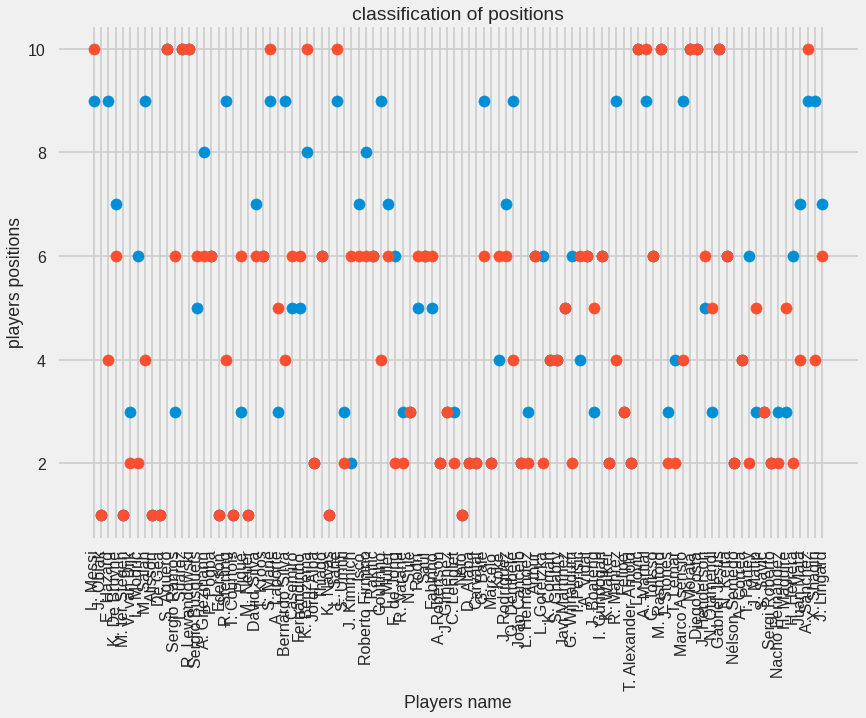

In [119]:
plot_df = fifa_20_club_df[["short_name", "player_positions"]][fifa_20_club_df["player_positions"] == y_val]
plot_df["pred_positions"] = val_pred
plot_df = plot_df.iloc[:100]
plt.style.use("fivethirtyeight")
plt.style.use("seaborn-poster")
plt.scatter(plot_df["short_name"], plot_df["player_positions"])
plt.scatter(plot_df["short_name"], plot_df["pred_positions"])
plt.xlabel("Players name")
plt.ylabel("players positions")
plt.title("classification of positions")
plt.xticks(rotation=90)
plt.show()

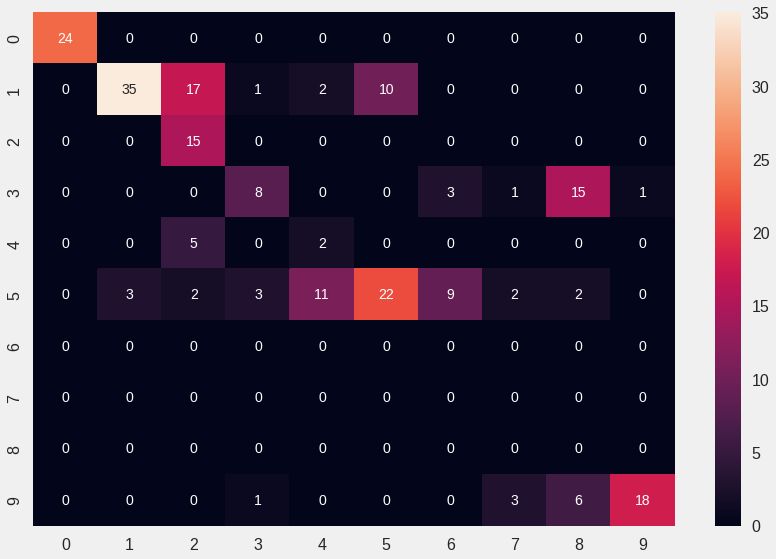

In [120]:
cm = confusion_matrix(val_pred, y_val)
sns.heatmap(cm, annot=True)
plt.show()

# Part C which team has the best Staff

In [121]:
df15 = pd.read_csv("players_15.csv")
df16 = pd.read_csv("players_16.csv")
df17 = pd.read_csv("players_17.csv")
df18 = pd.read_csv("players_18.csv")
df19 = pd.read_csv("players_19.csv")
df20 = pd.read_csv("players_20.csv")
league = pd.read_csv("teams_and_leagues.csv")

In [122]:
# strenth = ["club", 'shooting', 'pace', 'dribbling', 'dribbling', 'physic',
#           'attacking_crossing','attacking_finishing','attacking_heading_accuracy','attacking_short_passing',
#            'attacking_volleys','skill_dribbling','skill_curve','skill_fk_accuracy','skill_long_passing',
#            'skill_ball_control','movement_acceleration','movement_sprint_speed','movement_agility','movement_reactions',
#            'movement_balance','power_shot_power','power_jumping','power_stamina','power_strength','power_long_shots',
#            'mentality_aggression','mentality_interceptions','mentality_positioning','mentality_vision',
#            'mentality_penalties','mentality_composure','defending_marking','defending_standing_tackle',
#            'defending_sliding_tackle','goalkeeping_diving','goalkeeping_handling','goalkeeping_kicking',
#            'goalkeeping_positioning','goalkeeping_reflexes',]
dcol = ["club", 'defending', 'lwb', 'weak_foot', 'rm', 'work_rate', 'rw', 'international_reputation', 'cb', 'gk_kicking', 'rwb', 
        'player_url', 'lcb', 'rs', 'rb', 'nation_jersey_number', 'release_clause_eur', 'loaned_from',  'st', 
        'wage_eur', 'body_type', 'nation_position', 'lm', 'lcm', 'contract_valid_until', 'age', 'skill_moves', 'real_face', 
         'ls', 'lw', 'passing', 'gk_reflexes', 'cam', 'gk_positioning', 'ram', 'gk_handling', 'player_tags', 
        'height_cm', 'sofifa_id', 'rdm', 'ldm', 'value_eur', 'rcb', 'joined', 'player_positions', 'lam', 'rf', 'cdm', 
        'team_jersey_number', 'player_traits', 'cm', 'team_position', 'long_name', 'rcm', 'preferred_foot', 'cf', 'lf', 
        'lb', 'short_name', 'gk_speed', 'nationality', 'gk_diving', 'dob', 'weight_kg']
def preprocess2(df):
    df = df.fillna("0")
    new_df = df.drop(dcol, axis=1)
    for col in new_df.columns:
        if any(new_df[col].astype(str).str.contains("\+")):
            new_df[col] = new_df[[col]].applymap(plus_min_no)
    new_df = new_df.apply(pd.to_numeric)
    new_df["club"] = df["club"]
    return new_df
def preprocess3(df):
    dfg = preprocess2(df)
    dfg = dfg.groupby("club").mean().sort_values("overall", ascending=False).mean(axis=1)
    dfg = dfg.reset_index().rename(columns={0:'score'})
    return dfg

def merge(data):
    a = data[0]
    for b in data[1:]:
        a = a.merge(b,on='club')
    return a

In [123]:
dfg15 = preprocess3(df15)
dfg16 = preprocess3(df16)
dfg17 = preprocess3(df17)
dfg18 = preprocess3(df18)
dfg19 = preprocess3(df19)
dfg20 = preprocess3(df20)

In [124]:
dfg = merge([dfg15, dfg16, dfg17, dfg18, dfg19, dfg20])

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:9203: FutureWarning:

Passing 'suffixes' which cause duplicate columns {'score_x'} in the result is deprecated and will raise a MergeError in a future version.



In [125]:
dfg["final_score"] = dfg.mean(axis=1)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning:

Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.



In [126]:
mx = dfg["final_score"].max()
mn = dfg["final_score"].min()
def rouding(x):
    return round(((x - mn) / (mx - mn)) * 100, 2)
dfg["final_score"] = dfg[["final_score"]].applymap(rouding)

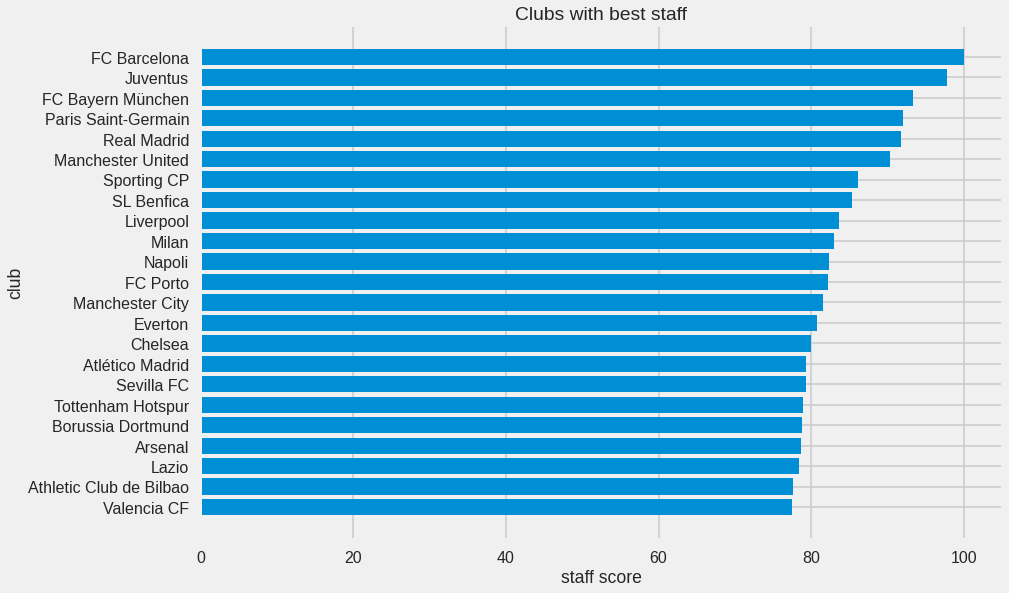

In [127]:
best_club = dfg.sort_values("final_score", ascending=False).loc[:25][::-1]
plt.style.use("fivethirtyeight")
plt.style.use("seaborn-poster")
plt.barh(best_club["club"], best_club["final_score"])
plt.title("Clubs with best staff")
plt.xlabel("staff score")
plt.ylabel("club")
plt.show()